# Lesson 1 Assignment - EnergyLoads
## Author - Studentname

### Instructions
In this exercise you will use visualization and summary statistical methods to explore a data set. You will be looking for interesting aspects in these data. Specifically, you will explore an energy efficiency data set.

This data set contains characteristics of over 750 buildings. The efficiency of the building is measured as either heating load or cooling load. Your goal is to find **three interesting relationships within the variables** which help you understand the energy efficiency of these buildings.

The exercise is deliberately open-ended. Whenever you approach a new data set some open-ended exploration is required. Expect this exploration to be an iterative process. You may need to try several ideas before you find truly interesting relationships.

The key points come from examining charts and summary statistics based on distribution Heating Load and Cooling Load. 
<font color="blue">At the end of this notebook include Markdown cells outlining your 3 key points.</font>

Example description:  The heating load of buildings depends on ... Evidence for this relationship can be seen by ... in the figure and by noting .... in the table above. 


#### Tip: 
There are no categorical variables in this data set. There are two numeric variables, Orientation and Glazing Area Distribution, with only 4 and 2 discrete values. You can convert these integer values to factors and examine the effect on the distribution of Heating Load and Cooling Load.

In [45]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Reading the data
url = "https://library.startlearninglabs.uw.edu/DATASCI410/Datasets/EnergyEfficiencyData.csv"
energy_load = pd.read_csv(url, header = 1)

# Assigning reasonable column names
energy_load.columns = ['relative_compactness', 'surface_area', 'wall_area', 
          'roof_area', 'overall_height', 'orientation', 'glazing_area', 'glazing_area_dist',
           'heating_load', 'cooling_load']

# Number of Observations
count_row = energy_load.shape[0]
print('there are',count_row, 'rows in this dataset')

# Number of Columns
count_col = energy_load.shape[1]
print('there are',count_col, 'columns in this dataset')

# Checking data types
energy_load_dtypes = energy_load.dtypes
print('data types by variable', energy_load_dtypes)

# First 10 rows

energy_load.head(10)

there are 767 rows in this dataset
there are 10 columns in this dataset
data types by variable relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_area_dist         int64
heating_load            float64
cooling_load            float64
dtype: object


,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_dist,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
3,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28
4,0.90,563.5,318.5,122.50,7.0,3,0.0,0,21.46,25.38
5,0.90,563.5,318.5,122.50,7.0,4,0.0,0,20.71,25.16
6,0.90,563.5,318.5,122.50,7.0,5,0.0,0,19.68,29.60
7,0.86,588.0,294.0,147.00,7.0,2,0.0,0,19.50,27.30
8,0.86,588.0,294.0,147.00,7.0,3,0.0,0,19.95,21.97
9,0.86,588.0,294.0,147.00,7.0,4,0.0,0,19.34,23.49


In [29]:
# Converting data types to numeric

cols = energy_load.columns

energy_load[cols] = energy_load[cols].apply(pd.to_numeric, errors='coerce')

# Rechecking data types

energy_load_dtypes = energy_load.dtypes
print('data types by variable', energy_load_dtypes)

# Replacing ? with NaN
energy_load = energy_load.replace(to_replace= "?", value=float("NaN"))

#suming Nans

energy_load_null = energy_load.isnull().sum()

print('nulls by variable', energy_load_null)


data types by variable relative_compactness    float64
surface_area            float64
wall_area               float64
roof_area               float64
overall_height          float64
orientation               int64
glazing_area            float64
glazing_area_dist         int64
heating_load            float64
cooling_load            float64
dtype: object
nulls by variable relative_compactness    0
surface_area            0
wall_area               0
roof_area               0
overall_height          0
orientation             0
glazing_area            0
glazing_area_dist       0
heating_load            0
cooling_load            0
dtype: int64


# Relationship 1

I want to examine the relationship between surface_area, wall_area, and heating load. I want to see if the larger area of a building results in less efficient heating load

In [42]:
# Looking at counts to see what is most popular cobination
energy_load['counts'] = 1
energy_load[['counts', 'surface_area','wall_area']].groupby(['surface_area','wall_area']).agg('count')

,,counts
surface_area,wall_area,
514.5,294.0,63
563.5,318.5,64
588.0,294.0,64
612.5,318.5,64
637.0,343.0,64
661.5,416.5,64
686.0,245.0,64
710.5,269.5,64
735.0,294.0,64


#### There does not appear to be a dominant most frequent combination. I will now look at a grouped box plot of heating load by surface area and wall area

(0.0, 50.0)

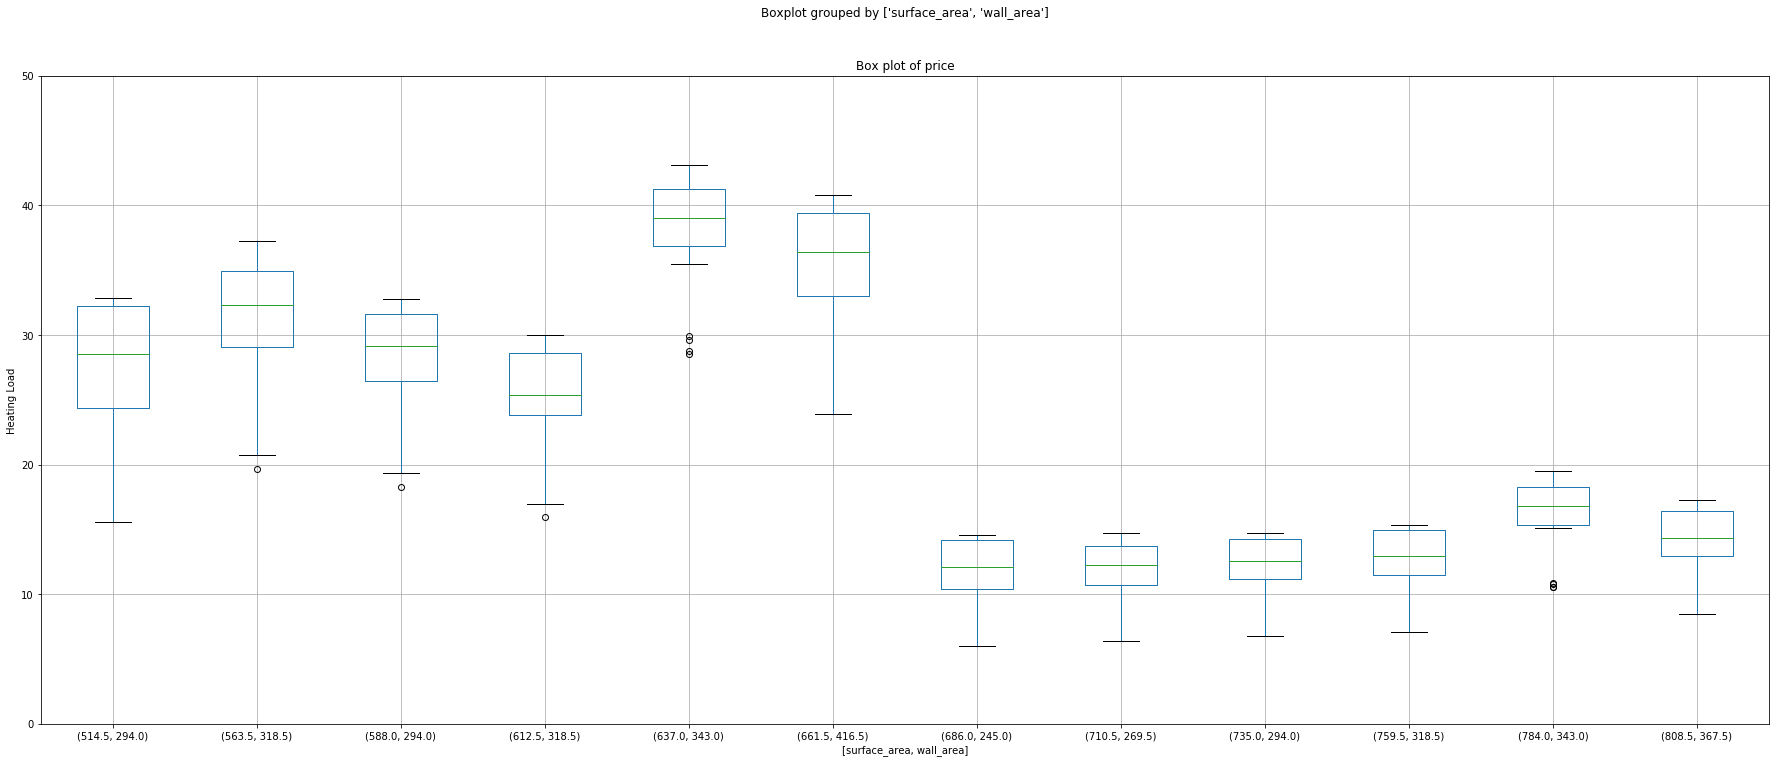

In [50]:
# Creating a box plot
fig = plt.figure(figsize=(30, 12)) # Define plot area
ax = fig.gca() # Define axis 
energy_load.loc[:,['heating_load', 'surface_area','wall_area']].boxplot(by = ['surface_area','wall_area'],ax = ax)
ax.set_title('Box plot of Heating Load') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

Conclusion:
The combination of surface area and wall area creates three separate groups of heating load ranges. Surface areas 514-612.5 and Wall Areas of 294/318.5 tend to have medium range heating loads. Surface areas of 637 & 661 combined with wall areas of 343/416.5 have high heating loads. The remaing surface area and wall area combinations have low heating loads

# Relationship 2

I want to examine the relationship between surface_area, wall_area, and cooling load. I want to see if the larger area of a building results in less efficient cooling load

(0.0, 50.0)

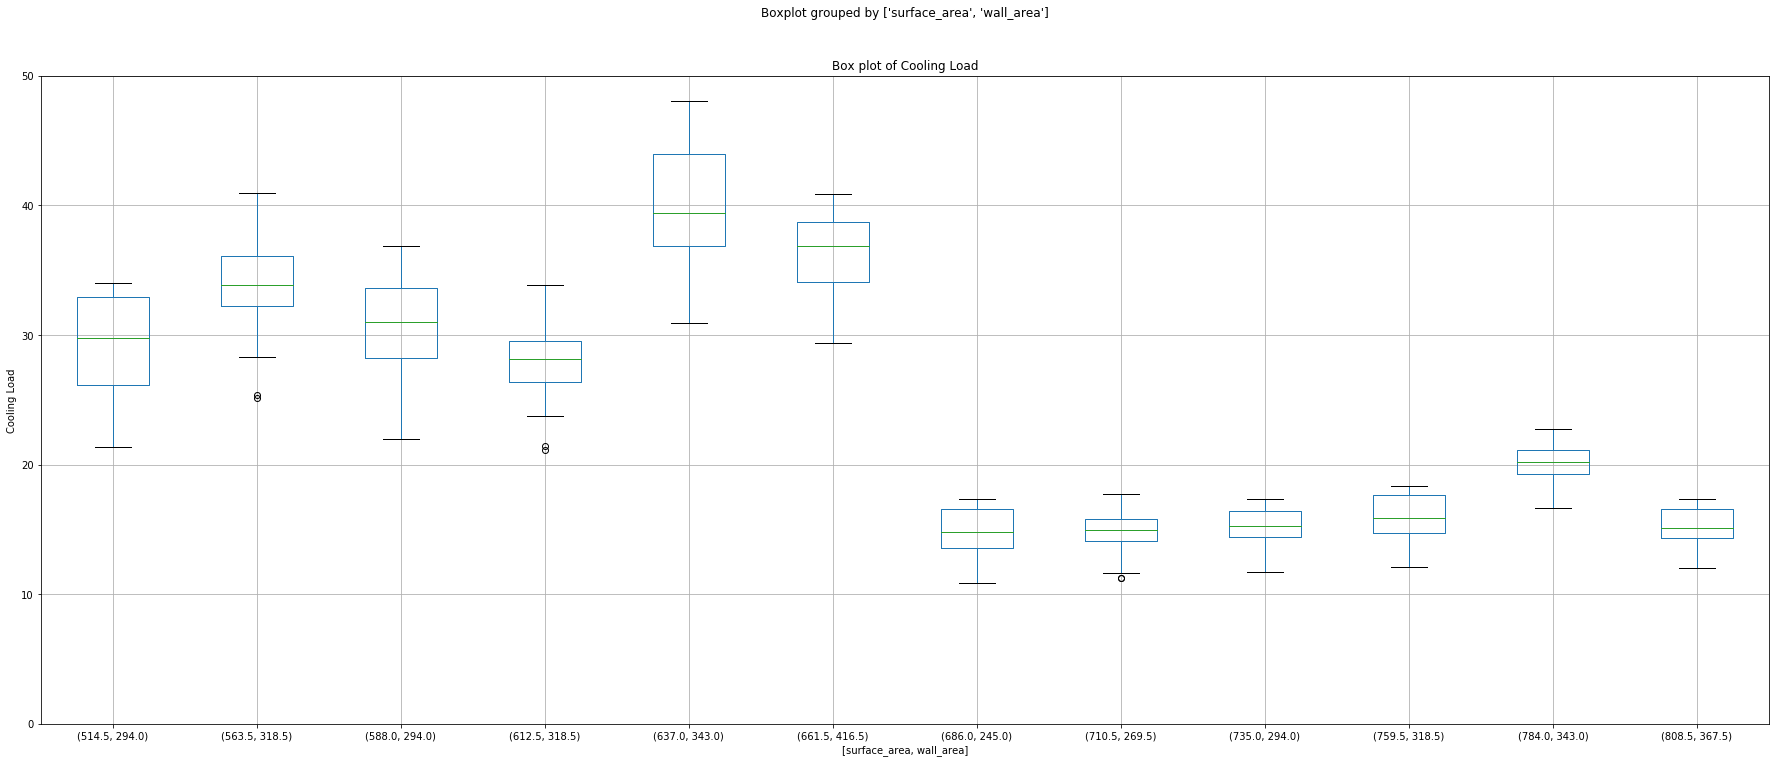

In [52]:
# Creating a box plot
fig = plt.figure(figsize=(30, 12)) # Define plot area
ax = fig.gca() # Define axis 
energy_load.loc[:,['cooling_load', 'surface_area','wall_area']].boxplot(by = ['surface_area','wall_area'],ax = ax)
ax.set_title('Box plot of Cooling Load') # Give the plot a main title
ax.set_ylabel('Cooling Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

Conclusion: Cooling load, similar to heating load has three separate groups of combinations of surace area and wall area. There may be value into combining these two variables and binning them

# Relationship 3

I want to examine the relationship between glazing area and heating load

In [53]:
# Looking at counts to see what is most popular cobination
energy_load['counts'] = 1
energy_load[['counts', 'glazing_area','heating_load']].groupby(['glazing_area','heating_load']).agg('count')

counts
glazing_area heating_load        
0.0          6.01               1
             6.04               1
             6.05               1
             6.07               1
             6.37               2
             6.40               2
             6.77               1
             6.79               1
             6.81               1
             6.85               1
             7.10               3
             7.18               1
             8.45               1
             8.49               1
             8.50               1
             8.60               1
             10.54              1
             10.56              1
             10.77              1
             10.85              1
             15.55              3
             15.98              1
             16.95              1
             17.05              1
             17.41              1
             18.31              1
             19.34              1
             19.50              1
             19.68              1
             19.95              1
...                           ...
0.4          40.11              1
             40.15              1
             40.40              1
             40.42              1
             40.43              1
             40.57              1
             40.60              1
             40.68              1
             40.71              1
             40.78              2
             40.79              1
             41.09              1
             41.26              1
             41.30              1
             41.32              1
             41.40              1
             41.64              1
             41.67              1
             41.73              1
             41.92              1
             41.96              1
             42.08              1
             42.11              1
             42.49              1
             42.50              1
             42.62              1
             42.74              1
             42.77              1
             42.96              1
             43.10              1

[638 rows x 1 columns]

The most frequent combination is 0 and 7.10 otherwise there appears to be a flat distribution between these two variables.

(0.0, 50.0)

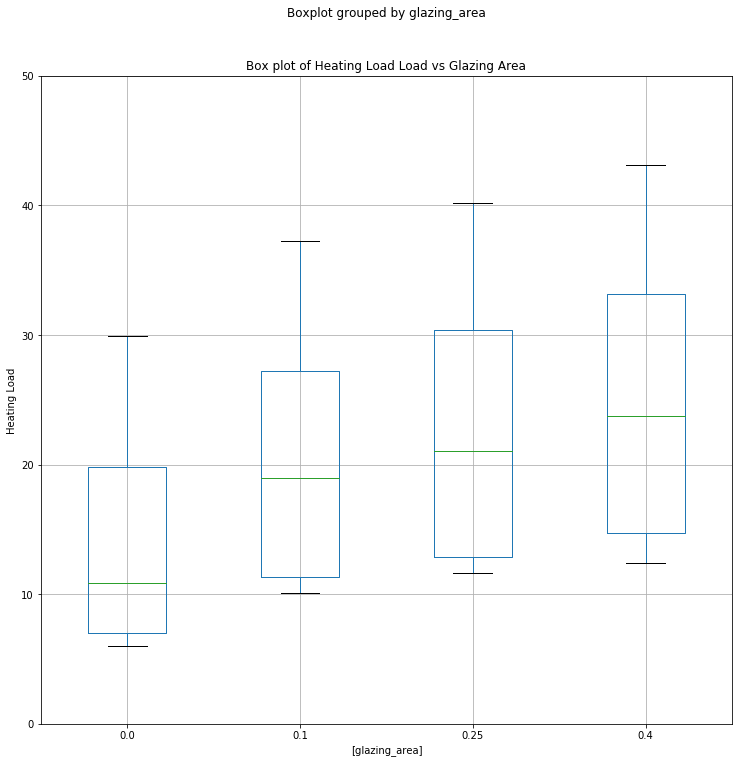

In [55]:
# Creating a box plot
fig = plt.figure(figsize=(12, 12)) # Define plot area
ax = fig.gca() # Define axis 
energy_load.loc[:,['heating_load','glazing_area' ]].boxplot(by = ['glazing_area'],ax = ax)
ax.set_title('Box plot of Heating Load Load vs Glazing Area') # Give the plot a main title
ax.set_ylabel('Heating Load')# Set text for y axis
ax.set_ylim(0.0, 50.0) # Set the limits of the y axis

Conclusion: The boxplost shows that buildings with a glazing area around .4 have the highest heating load and 0.0 has the lowest. It appears to be a linear relationship

# Three key points

(1) surface_area, wall_area, and heating load

The combination of surface area and wall area creates three separate groups of heating load ranges. Surface areas 514-612.5 and Wall Areas of 294/318.5 tend to have medium range heating loads. Surface areas of 637 & 661 combined with wall areas of 343/416.5 have high heating loads. The remaing surface area and wall area combinations have low heating loads

(2) surface_area, wall_area, and heating load

Cooling load, similar to heating load has three separate groups of combinations of surace area and wall area. There may be value into combining these two variables and binning them

(3) glazing area, heating load

The boxplost shows that buildings with a glazing area around .4 have the highest heating load and 0.0 has the lowest. It appears to be a linear relationship



